In [1]:
#Importing Libraries
try:
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.preprocessing import LabelEncoder 
    from sklearn.metrics import accuracy_score,confusion_matrix
    from sklearn.model_selection import train_test_split
    import pandas as pd
    import numpy as np
    import warnings
    import time
    from scipy import stats
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sys , os
    from sklearn import metrics
    print("modules imported")

except:
    print("module not found")

DeprecationWarning("ignore")
warnings.filterwarnings("ignore")


modules imported


In [2]:
os.listdir()

['.ipynb_checkpoints',
 'credit.py',
 'credit_risk.csv',
 'main.ipynb',
 'test.csv']

In [3]:
try:
    df=pd.read_csv('credit_risk.csv')
    print("data imported")
except:
    print("data not imported")

data imported


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:>

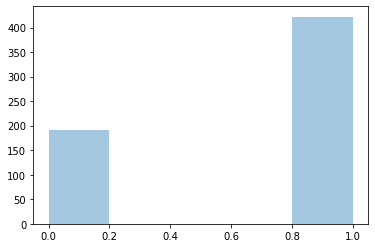

In [10]:
sns.distplot(np.where(df['Loan_Status']=='Y',1,0), hist = True, kde= False)


In [11]:
'''From this graph i can say that person getting loan is twice as compare to not getting Loan'''

'From this graph i can say that person getting loan is twice as compare to not getting Loan'

In [12]:
df.Married.mode()

0    Yes
dtype: object

In [13]:
#Filling Null data and Using Label encoder
from sklearn.preprocessing import LabelEncoder

def preprocessing(df):
    
    df.Gender.fillna('Male', inplace=True)
    df.Dependents.fillna('0' , inplace= True)
    df.Married.fillna('Yes' ,inplace= True)
    df.Self_Employed.fillna('No',inplace=True)
    df.LoanAmount.fillna(df.LoanAmount.mean(),inplace=True)
    df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(),inplace=True)
    df.Credit_History.fillna(df.Credit_History.mean(),inplace=True)
    return df

    
def label_encode(df):
    from sklearn.preprocessing import LabelEncoder 
    label=LabelEncoder()
    df.Gender=label.fit_transform(df['Gender'])
    df.Education = label.fit_transform(df['Education'])
    df.Married=label.fit_transform(df['Married'])
    df.Dependents=label.fit_transform(df['Dependents'])
    df.Self_Employed=label.fit_transform(df['Self_Employed'])
    df.Loan_Status=label.fit_transform(df['Loan_Status'])
    return df

df = preprocessing(df) 
df = label_encode(df)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(2)
memory usage: 48.1+ KB


In [16]:
#spliting data in train test
train,test =train_test_split(df,test_size=0.2,random_state=13)

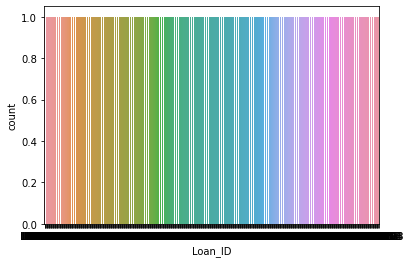

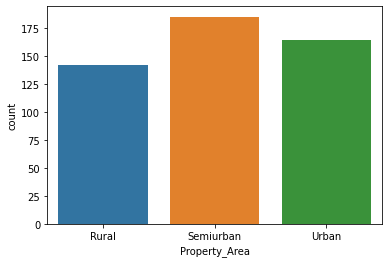

In [17]:
cat = train.select_dtypes(include = object)
for col in cat:
    sns.countplot(train[col].dropna())
    plt.show()

<AxesSubplot:xlabel='Married', ylabel='count'>

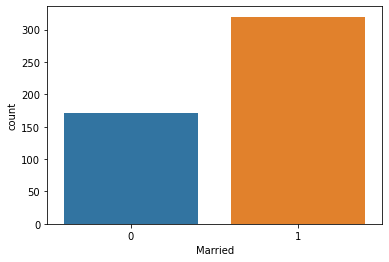

In [18]:
sns.countplot(train.Married) # majority is of yes, infact its double

In [19]:
#Dividing into X and Y
def x_and_y(df):
    x=df.drop(["Loan_ID","Property_Area","Married","Loan_Status","Gender","Education"],axis=1)
    y=df["Loan_Status"]
    return x, y

x_train,y_train=x_and_y(train)
x_test,y_test=x_and_y(test)

In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 376 to 338
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         491 non-null    int32  
 1   Self_Employed      491 non-null    int32  
 2   ApplicantIncome    491 non-null    int64  
 3   CoapplicantIncome  491 non-null    float64
 4   LoanAmount         491 non-null    float64
 5   Loan_Amount_Term   491 non-null    float64
 6   Credit_History     491 non-null    float64
dtypes: float64(4), int32(2), int64(1)
memory usage: 46.9 KB


In [21]:
#Training Our Model
#Decision tree
d_model= DecisionTreeClassifier()
d_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
print("Decision tree Test score:{}".format(d_model.score(x_test,y_test)))

Decision tree Test score:0.8048780487804879


In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix
x_test_prediction=d_model.predict(x_test)
confusion_matrix(y_test, x_test_prediction)
pd.crosstab(y_test, x_test_prediction, rownames = ['Actual'], colnames =['Predicted'], margins = True)


Predicted,0,1,All
Actual,,,
0,25,10,35
1,14,74,88
All,39,84,123


In [24]:

from sklearn.metrics import recall_score, precision_score
recall=recall_score(y_test, x_test_prediction)
precision=precision_score(y_test, x_test_prediction)
print("recall = {} \nprecision = {}".format(recall,precision))



recall = 0.8409090909090909 
precision = 0.8809523809523809


In [38]:
#Precision is 0.8809 or, when it predicts that an applicant will get Loan, it is correct around 88% of the time.

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, x_test_prediction))

              precision    recall  f1-score   support

           0       0.64      0.71      0.68        35
           1       0.88      0.84      0.86        88

    accuracy                           0.80       123
   macro avg       0.76      0.78      0.77       123
weighted avg       0.81      0.80      0.81       123



# Save Model

In [33]:
import pickle

with open("classifier.bin", "wb") as fout:
    pickle.dump(d_model, fout)
    fout.close()

In [34]:
#Loading model

with open("classifier.bin","rb") as fin:
    model = pickle.load(fin)
    fin.close()


In [35]:
os.listdir()

['.ipynb_checkpoints',
 'classifier.bin',
 'credit.py',
 'credit_risk.csv',
 'main.ipynb',
 'test.csv']

In [46]:
testdata = pd.read_csv("test.csv")

In [47]:
testdata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [49]:
testdata = preprocessing(testdata)

In [50]:
def test_label_encode(df):
    from sklearn.preprocessing import LabelEncoder 
    label=LabelEncoder()
    df.Gender=label.fit_transform(df['Gender'])
    df.Education = label.fit_transform(df['Education'])
    df.Married=label.fit_transform(df['Married'])
    df.Dependents=label.fit_transform(df['Dependents'])
    df.Self_Employed=label.fit_transform(df['Self_Employed'])
    return df

testdata = test_label_encode(testdata)

In [51]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,Urban
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.000000,Urban


In [52]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [54]:
testdata = testdata.drop(["Loan_ID","Property_Area","Married","Gender","Education"],axis=1)

In [55]:
testdata.columns

Index(['Dependents', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [56]:
x_train.columns

Index(['Dependents', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [57]:
prediction = model.predict(testdata)

In [58]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,